# DATA PRE-PROCESSING

In [1]:
#libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
from pandas_profiling import ProfileReport
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from collections.abc import Sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM,GRU
import tensorflow as tf
from keras.layers import Input
from keras.models import Model
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D 
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score)

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from collections.abc import Sequence


In [3]:
column_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

In [4]:
train = pd.read_csv('KDDTrain+.txt',header=None, names=column_names)#training dataset
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
train=train.drop(columns='difficulty_level')#droping last column

In [6]:
train.shape

(125973, 42)

In [7]:
test=pd.read_csv('KDDTest+.txt',header=None, names=column_names)#testing dataset
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [8]:
test=test.drop(columns='difficulty_level')#droping last column

In [9]:
test.shape

(22544, 42)

Combining the training and testing datasets for easy processing





In [10]:
data= pd.concat([train, test])
data.shape

(148517, 42)

In [11]:
data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

Null value check

In [12]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Duplicate data check

In [13]:
dup = data.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 610


In [14]:
data.drop_duplicates(inplace = True)
data.reset_index(inplace= True)
data.drop('index', axis=1, inplace=True)

In [15]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147902,1,tcp,smtp,SF,2599,293,0,0,0,0,...,186,0.73,0.13,0.00,0.00,0.00,0.00,0.26,0.00,mailbomb
147903,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
147904,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
147905,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back


Protocol type distribution #data exploration

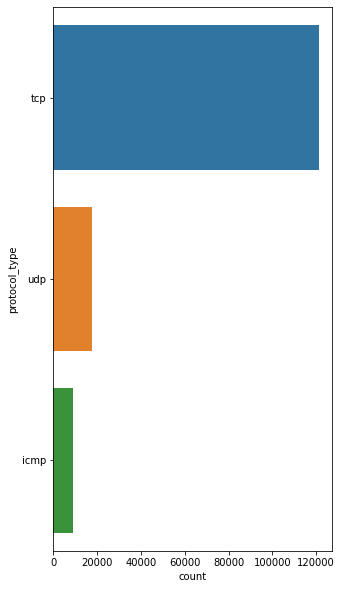

In [16]:
plt.figure(figsize=(5,10))
sns.countplot(y="protocol_type", data=data)
plt.show()

Service distribution  # data exploration

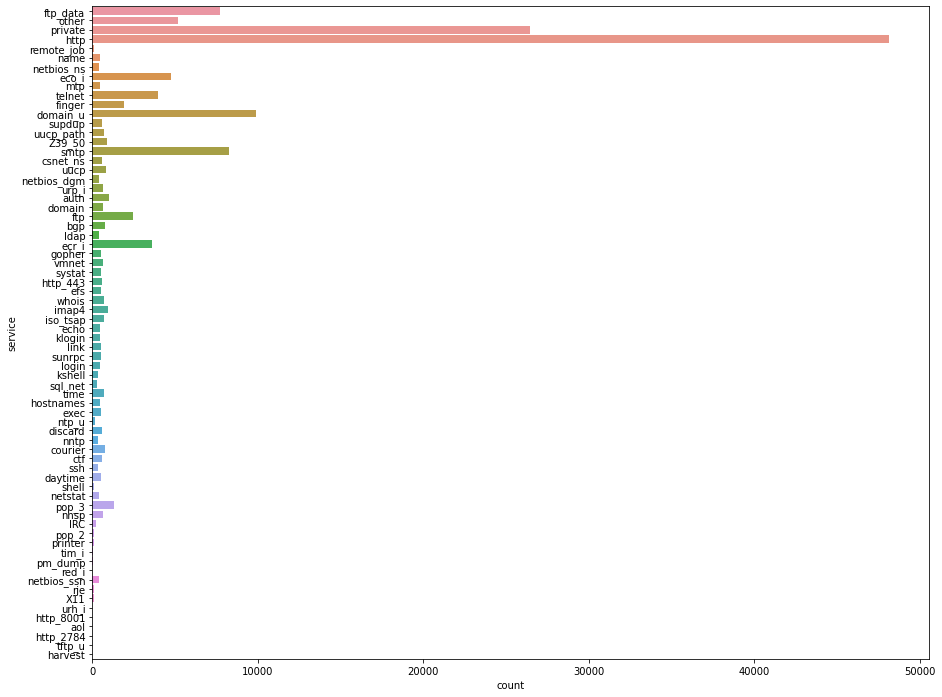

In [17]:
plt.figure(figsize=(15,12))
sns.countplot(y="service", data=data)
plt.show()

Flag distribution #data exploration

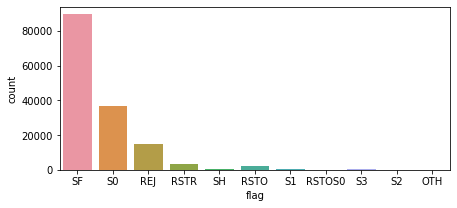

In [18]:
plt.figure(figsize=(7,3))
sns.countplot(x="flag", data=data)
plt.show()

**DATA NORMALIZATION**

In [19]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [20]:

num_data= data.select_dtypes(include='number').columns #selecting columns whose dtype is numeric

In [21]:
scaler=StandardScaler()#normalising the dataset value 
def normalization(data,column):
  for i in column:
    x = data[i]
    x= np.array(x)
    data[i] = scaler.fit_transform(x.reshape(len(x),1))
  return data

In [22]:
data=normalization(data,num_data)

New dataset after normalising

In [23]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.112716,tcp,ftp_data,SF,-0.007360,-0.004623,-0.014004,-0.085118,-0.010425,-0.094170,...,-0.848781,-0.812254,-0.279291,0.084144,-0.282255,-0.598802,-0.585848,-0.266567,-0.406346,normal
1,-0.112716,udp,other,SF,-0.007423,-0.004623,-0.014004,-0.085118,-0.010425,-0.094170,...,-1.064599,-1.191758,2.657076,2.400683,-0.282255,-0.598802,-0.585848,-0.421678,-0.406346,normal
2,-0.112716,tcp,private,S0,-0.007450,-0.004623,-0.014004,-0.085118,-0.010425,-0.094170,...,-0.839789,-0.968520,-0.176260,-0.470520,-0.282255,1.733009,1.739294,-0.421678,-0.406346,neptune
3,-0.112716,tcp,http,SF,-0.007408,-0.002427,-0.014004,-0.085118,-0.010425,-0.094170,...,1.219478,1.040616,-0.433836,-0.372639,0.094016,-0.528847,-0.562596,-0.421678,-0.376489,normal
4,-0.112716,tcp,http,SF,-0.007414,-0.004510,-0.014004,-0.085118,-0.010425,-0.094170,...,1.219478,1.040616,-0.433836,-0.470520,-0.282255,-0.598802,-0.585848,-0.421678,-0.406346,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147902,-0.112310,tcp,smtp,SF,-0.006971,-0.004545,-0.014004,-0.085118,-0.010425,-0.094170,...,0.599001,0.437875,0.235861,-0.470520,-0.282255,-0.598802,-0.585848,0.384902,-0.406346,mailbomb
147903,-0.112716,tcp,smtp,SF,-0.007304,-0.004534,-0.014004,-0.085118,-0.010425,-0.094170,...,0.194341,0.415551,-0.124745,-0.437893,-0.188187,-0.575484,-0.585848,-0.421678,-0.406346,normal
147904,-0.112716,tcp,http,SF,-0.007392,-0.004371,-0.014004,-0.085118,-0.010425,-0.094170,...,1.219478,1.040616,-0.433836,-0.437893,-0.188187,-0.575484,-0.585848,-0.421678,-0.406346,normal
147905,-0.112716,tcp,http,SF,0.002611,-0.002383,-0.014004,-0.085118,-0.010425,0.897313,...,1.219478,1.040616,-0.433836,-0.470520,-0.282255,-0.598802,-0.585848,-0.204522,-0.197346,back


**ONE HOT ENCODING**

One-hot encoding of Categorical Attributes :- Protocol_type,service,flag

In [24]:
def encode(data,attribute):
  dummies = pd.get_dummies(data[attribute])#.get_dummies function used for encoding categorical attributes
  for x in dummies.columns:
    att = "{}-{}".format(attribute, x)
    data[att] = dummies[x]
  data.drop(attribute, axis=1, inplace=True)


In [25]:
encode(data,'protocol_type')
encode(data,'service')
encode(data,'flag')

Data after encoding these 3 attributes

In [26]:
data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag-REJ,flag-RSTO,flag-RSTOS0,flag-RSTR,flag-S0,flag-S1,flag-S2,flag-S3,flag-SF,flag-SH
0,-0.112716,-0.007360,-0.004623,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,-0.823833,-0.011492,...,0,0,0,0,0,0,0,0,1,0
1,-0.112716,-0.007423,-0.004623,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,-0.823833,-0.011492,...,0,0,0,0,0,0,0,0,1,0
2,-0.112716,-0.007450,-0.004623,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,-0.823833,-0.011492,...,0,0,0,0,1,0,0,0,0,0
3,-0.112716,-0.007408,-0.002427,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,1.213838,-0.011492,...,0,0,0,0,0,0,0,0,1,0
4,-0.112716,-0.007414,-0.004510,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,1.213838,-0.011492,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147902,-0.112310,-0.006971,-0.004545,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,1.213838,-0.011492,...,0,0,0,0,0,0,0,0,1,0
147903,-0.112716,-0.007304,-0.004534,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,1.213838,-0.011492,...,0,0,0,0,0,0,0,0,1,0
147904,-0.112716,-0.007392,-0.004371,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,1.213838,-0.011492,...,0,0,0,0,0,0,0,0,1,0
147905,-0.112716,0.002611,-0.002383,-0.014004,-0.085118,-0.010425,0.897313,-0.059956,1.213838,0.033397,...,0,0,0,0,0,0,0,0,1,0


In [27]:
data['label'].value_counts()#All type of attack and normal data

normal             76967
neptune            45716
satan               4360
ipsweep             3643
smurf               3108
portsweep           3070
nmap                1566
back                1300
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             901
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  221
snmpgetattack        178
httptunnel           133
buffer_overflow       50
multihop              25
rootkit               23
land                  22
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm               2



**Different types of Attacks and class they belong to**

apache2=dos ,
normal=normal,
back=dos,
buffer_overflow=u2r,
ftp_write=r2l,
guess_passwd=r2l,
httptunnel=r2l,
imap=r2l,
ipsweep=probe,
land=dos,
loadmodule=u2r,
mailbomb=dos,
mscan=probe,
multihop=r2l,
named=r2l,
neptune=dos,
nmap=probe,
ps=u2r,
perl=u2r,
phf=r2l,
pod=dos,
processtable=dos,
portsweep=probe,
rootkit=u2r,
saint=probe,
satan=probe,
sendmail=r2l,
smurf=dos,
snmpguess=r2l,
snmpgetattack=r2l,
sqlattack=u2r,
spy=r2l,
teardrop=dos,
udpstorm=dos,
worm=dos,
warezclient=r2l,
warezmaster=r2l,
xlock=r2l,
xsnoop=r2l,
xterm=u2r,
snmpgetattack=r2l,
named=r2l.

In [28]:
#Changing the labels to their class
def labels(data):
  data.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  data.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  data.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  data.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [29]:
labels(data)

In [30]:
data['label'].value_counts()

normal    76967
Dos       52987
Probe     13954
R2L        3880
U2R         119
Name: label, dtype: int64

New attack attribute containing 0,1,2,3,4 values based on the labels
Normal:-0
Dos:- 1
Probe:-2
R2L:-3
U2R:- 4

In [31]:
data.label

0         normal
1         normal
2            Dos
3         normal
4         normal
           ...  
147902       Dos
147903    normal
147904    normal
147905       Dos
147906     Probe
Name: label, Length: 147907, dtype: object

In [32]:
def label_encoding(data, attribute):#object to numeric 
    enc = preprocessing.LabelEncoder()
    data[attribute] = enc.fit_transform(data[attribute])
    return enc.classes_

In [33]:
enc_label=label_encoding(data,'label')
data['label']

0         4
1         4
2         0
3         4
4         4
         ..
147902    0
147903    4
147904    4
147905    0
147906    1
Name: label, Length: 147907, dtype: int64

In [34]:
Attack=label_encoding(data,'label')
Attack

array([0, 1, 2, 3, 4])

Data after encodiing text values to indexes such as 0,1,2,3,4

In [35]:
data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag-REJ,flag-RSTO,flag-RSTOS0,flag-RSTR,flag-S0,flag-S1,flag-S2,flag-S3,flag-SF,flag-SH
0,-0.112716,-0.007360,-0.004623,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,-0.823833,-0.011492,...,0,0,0,0,0,0,0,0,1,0
1,-0.112716,-0.007423,-0.004623,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,-0.823833,-0.011492,...,0,0,0,0,0,0,0,0,1,0
2,-0.112716,-0.007450,-0.004623,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,-0.823833,-0.011492,...,0,0,0,0,1,0,0,0,0,0
3,-0.112716,-0.007408,-0.002427,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,1.213838,-0.011492,...,0,0,0,0,0,0,0,0,1,0
4,-0.112716,-0.007414,-0.004510,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,1.213838,-0.011492,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147902,-0.112310,-0.006971,-0.004545,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,1.213838,-0.011492,...,0,0,0,0,0,0,0,0,1,0
147903,-0.112716,-0.007304,-0.004534,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,1.213838,-0.011492,...,0,0,0,0,0,0,0,0,1,0
147904,-0.112716,-0.007392,-0.004371,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,1.213838,-0.011492,...,0,0,0,0,0,0,0,0,1,0
147905,-0.112716,0.002611,-0.002383,-0.014004,-0.085118,-0.010425,0.897313,-0.059956,1.213838,0.033397,...,0,0,0,0,0,0,0,0,1,0


Features analysis using Logistic Regression

In [36]:
#data=data.astype({"label":int})

In [37]:
data.label#label check

0         4
1         4
2         0
3         4
4         4
         ..
147902    0
147903    4
147904    4
147905    0
147906    1
Name: label, Length: 147907, dtype: int64

In [38]:
input=data.drop('label',axis=1)#input data 

In [39]:
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(input, data['label'], test_size=0.3, random_state=45)

In [40]:
print(x_train_lr.shape, y_train_lr.shape)
print(x_test_lr.shape, y_test_lr.shape)

(103534, 122) (103534,)
(44373, 122) (44373,)


In [41]:
def coef(attribute, coef, intercept):#takes the cofecients and inttercept calculated by regression model
    c = pd.DataFrame( { 'coef': coef, 'positive': coef>=0  }, index = attribute )
    c = c.sort_values(by=['coef'])
    display(c)
    print("Intercept: {}".format(intercept))
    return c


In [42]:
reg = LogisticRegression(max_iter=1000)#building regression model
reg.fit(x_train_lr, y_train_lr)#raining
pred = reg.predict(x_test_lr)#prediction

In [43]:
attributes = list(data.columns.values)
attributes.remove("label")
attributes = np.array(attributes)
cf= coef(attributes, reg.coef_[0], reg.intercept_)

,coef,positive
num_file_creations,-8.575736,False
is_guest_login,-8.407496,False
protocol_type-udp,-5.936987,False
src_bytes,-3.485051,False
same_srv_rate,-3.392758,False
...,...,...
dst_host_same_srv_rate,2.678240,True
protocol_type-tcp,2.688839,True
protocol_type-icmp,3.263053,True
service-ecr_i,5.495162,True


Intercept: [ 0.54835962  3.01563704 -4.09968602 -6.11355039  6.64923975]


Eliminating columns with a Coefficient below absolute 1 since their values won't significantly help with the prediction

In [44]:
att = cf[ (cf['coef'] < 1) & (cf['coef'] > -1) ].index #attributes that will be droped due to their coffecient value between -1 and 1
print(len(att))

79


In [45]:
data = data.drop(att, axis=1, inplace=False)
data.shape

(147907, 44)

In [46]:
#downloaded new cleaned ,combined dataset
#data.to_csv('data.csv)

In [47]:
data#after droping the attributes 


,src_bytes,wrong_fragment,hot,num_failed_logins,root_shell,num_file_creations,is_guest_login,count,srv_count,srv_serror_rate,...,service-time,service-urp_i,flag-REJ,flag-RSTO,flag-RSTOS0,flag-RSTR,flag-S0,flag-S3,flag-SF,flag-SH
0,-0.007360,-0.085118,-0.094170,-0.059956,-0.038946,-0.023361,-0.111865,-0.695570,-0.346941,-0.591328,...,0,0,0,0,0,0,0,0,1,0
1,-0.007423,-0.085118,-0.094170,-0.059956,-0.038946,-0.023361,-0.111865,-0.601171,-0.360316,-0.591328,...,0,0,0,0,0,0,0,0,1,0
2,-0.007450,-0.085118,-0.094170,-0.059956,-0.038946,-0.023361,-0.111865,0.342819,-0.293439,1.718444,...,0,0,0,0,0,0,1,0,0,0
3,-0.007408,-0.085118,-0.094170,-0.059956,-0.038946,-0.023361,-0.111865,-0.669824,-0.306814,-0.129374,...,0,0,0,0,0,0,0,0,1,0
4,-0.007414,-0.085118,-0.094170,-0.059956,-0.038946,-0.023361,-0.111865,-0.455281,0.054324,-0.591328,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147902,-0.006971,-0.085118,-0.094170,-0.059956,-0.038946,-0.023361,-0.111865,-0.695570,-0.346941,-0.591328,...,0,0,0,0,0,0,0,0,1,0
147903,-0.007304,-0.085118,-0.094170,-0.059956,-0.038946,-0.023361,-0.111865,-0.704151,-0.360316,-0.591328,...,0,0,0,0,0,0,0,0,1,0
147904,-0.007392,-0.085118,-0.094170,-0.059956,-0.038946,-0.023361,-0.111865,-0.695570,-0.226561,-0.591328,...,0,0,0,0,0,0,0,0,1,0
147905,0.002611,-0.085118,0.897313,-0.059956,-0.038946,-0.023361,-0.111865,-0.669824,-0.239937,-0.591328,...,0,0,0,0,0,0,0,0,1,0




1.   Dos : 0
2.   Probe : 1
3.   R2L :  2,
4.   U2R :  3,
5.   Normal  : 4


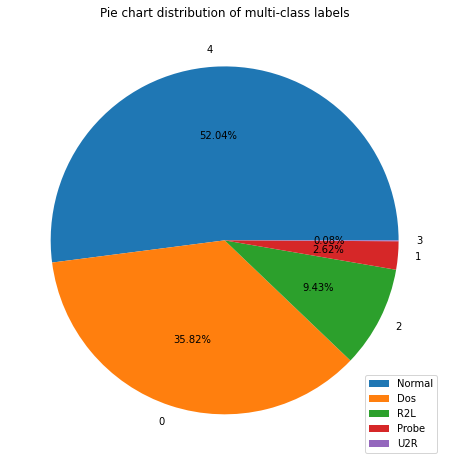

In [48]:
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=data.label.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(['Normal','Dos' ,'R2L','Probe','U2R'])
plt.savefig('Pie_chart.png')
plt.show()

DATA CONVERSION FOR TENSOR
FLOW INPUTS

In [49]:
#Aim of this conversion to transform the label into one hot encoding for tensorflow processing
def conv(data,output):#convverting the data's types that is accepted by tensorflow
    result = []#the data that's not label
    for x in data.columns:
        if x != output:
            result.append(x)
    out_type = data[output].dtypes
    out_type = out_type[0] if isinstance(out_type, Sequence) else out_type
    if out_type in (np.int64, np.int32):#only if it's in integer ,perforn one hot encoding
        dummies = pd.get_dummies(data[output])
        return data[result].values.astype(np.float32), dummies.values.astype(np.float32)#input and labels which are one hot encoded
    else:
        return data[result].values.astype(np.float32), data[output].values.astype(np.float32)


In [50]:
x,y=conv(data,'label')#input data and output labels

Splitting the dataset into training and testing (final data )

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=45)

In [52]:
print(x_train.shape, x_test.shape)#shapes of the trainiing and testing data
print(y_train.shape, y_test.shape)

(103534, 43) (44373, 43)
(103534, 5) (44373, 5)


# Deep Learning Models


1.   Deep Neural Network(DNN)
2.   Convolutional Neural Network(CNN)
3.   Long Short-Term Memory(LSTM)
4.   GRU
5.   Auto Encoder Classifier




##**Deep Neural Network**

### Neural Network : Model 1
*   **Model contains 6 layer over all with 4 layers being hidden ,an input layer and an output layer.**
*   **Activation function : Relu,softmax**
*   **Optimizer : Adam**






In [55]:
#converting the data in to an array for processing.
X_train=np.array(x_train)
X_test=np.array(x_test)
Y_train = np.array(y_train)
Y_test = np.array(y_test)

In [422]:
dnn_model=Sequential()#Deep neural network model
dnn_model.add(Dense(1024, activation='relu', input_dim=X_train.shape[1]))
dnn_model.add(Dropout(0.01))
dnn_model.add(Dense(768, activation='relu'))
dnn_model.add(Dropout(0.01))
dnn_model.add(Dense(512, activation='relu'))
dnn_model.add(Dropout(0.01))
dnn_model.add(Dense(256, activation='relu'))
dnn_model.add(Dropout(0.01))
dnn_model.add(Dense(128, activation='relu'))
dnn_model.add(Dense(5, activation='softmax'))

In [423]:
dnn_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 1024)              45056     
                                                                 
 dropout_58 (Dropout)        (None, 1024)              0         
                                                                 
 dense_32 (Dense)            (None, 768)               787200    
                                                                 
 dropout_59 (Dropout)        (None, 768)               0         
                                                                 
 dense_33 (Dense)            (None, 512)               393728    
                                                                 
 dropout_60 (Dropout)        (None, 512)               0         
                                                                 
 dense_34 (Dense)            (None, 256)             

In [ ]:
dnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])#compiling the model
history=dnn_model.fit(X_train, Y_train, epochs=100, batch_size=500, validation_data=(X_test, Y_test)) #training of the model and validating with test dataset 


Epoch 1/100
208/208 [==============================] - 25s 116ms/step - loss: 0.1246 - accuracy: 0.9610 - val_loss: 0.0661 - val_accuracy: 0.9777
Epoch 2/100
208/208 [==============================] - 24s 116ms/step - loss: 0.0570 - accuracy: 0.9807 - val_loss: 0.0607 - val_accuracy: 0.9807
Epoch 3/100
208/208 [==============================] - 24s 116ms/step - loss: 0.0528 - accuracy: 0.9816 - val_loss: 0.0623 - val_accuracy: 0.9797
Epoch 4/100
208/208 [==============================] - 25s 122ms/step - loss: 0.0469 - accuracy: 0.9842 - val_loss: 0.0664 - val_accuracy: 0.9772
Epoch 5/100
208/208 [==============================] - 24s 116ms/step - loss: 0.0474 - accuracy: 0.9833 - val_loss: 0.0483 - val_accuracy: 0.9832
Epoch 6/100
208/208 [==============================] - 24s 116ms/step - loss: 0.0432 - accuracy: 0.9848 - val_loss: 0.0495 - val_accuracy: 0.9839
Epoch 7/100
208/208 [==============================] - 24s 114ms/step - loss: 0.0408 - accuracy: 0.9856 - val_loss: 0.0491 -

In [ ]:
loss,accuracy=dnn_model.evaluate(x_test, y_test, verbose=1)#Loss and Accuracy obtained after validating
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

1387/1387 [==============================] - 8s 6ms/step - loss: 0.0483 - accuracy: 0.9911

Loss: 0.05, Accuracy: 99.11%


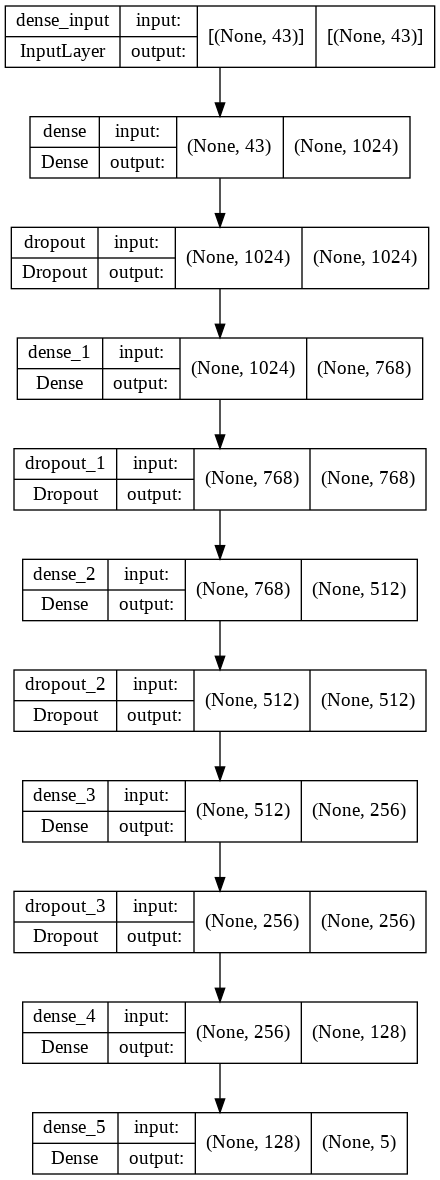

In [ ]:
tf.keras.utils.plot_model(dnn_model, 'dnn_model.png', show_shapes=True)#Architechture

In [ ]:
model_pred=dnn_model.predict(x_test)#prediction using the test data
model_pred= np.argmax(model_pred, axis = 1) #highest probability
model_true=y_test
model_true= np.argmax(model_true, axis = 1)

#Accuracy Score:-
Accuracy=accuracy_score(model_true,model_pred)*100
print('Accuracy =',Accuracy)

#Precision Score:-
Precision = precision_score(model_true, model_pred, average= "weighted")
print('Precision =',Precision)

#Recall Scores:-
Recall = recall_score(model_true, model_pred, average= "weighted")
print('Recall =',Recall)

#F1 Scores:-
F1 = f1_score(model_true, model_pred, average= "weighted")
print('F1 score =',F1)

Accuracy = 99.1120726567958
Precision = 0.9910132417835087
Recall = 0.991120726567958
F1 score = 0.9910521683887266


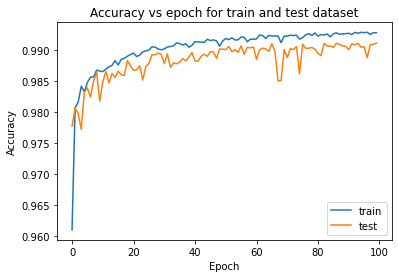

In [ ]:
#plot of training and testing data's accuracy on each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy vs epoch for train and test dataset")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

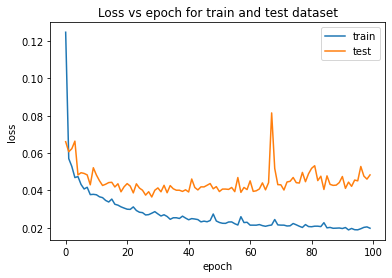

In [ ]:
#plot describing training and testing data's loss value on each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epoch for train and test dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
model_pred=dnn_model.predict(x_test)#prediction using the test data
pred= np.argmax(model_pred, axis = 1)
print(pred)

[4 4 0 ... 0 4 0]


### Neural Network : Model 2
*   **Model contains 6 layer over all with 4 layers being hidden ,an input layer and an output layer.**
*   **Activation function : Relu,softmax**
*   **Optimizer : sgd**



In [234]:
dnn_model=Sequential()#Deep neural network model
dnn_model.add(Dense(1024, activation='relu', input_dim=X_train.shape[1]))
dnn_model.add(Dropout(0.01))
dnn_model.add(Dense(768, activation='relu'))
dnn_model.add(Dropout(0.01))
dnn_model.add(Dense(512, activation='relu'))
dnn_model.add(Dropout(0.01))
dnn_model.add(Dense(256, activation='relu'))
dnn_model.add(Dropout(0.01))
dnn_model.add(Dense(128, activation='relu'))
dnn_model.add(Dense(5, activation='softmax'))

In [235]:
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1024)              45056     
                                                                 
 dropout_8 (Dropout)         (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 768)               787200    
                                                                 
 dropout_9 (Dropout)         (None, 768)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               393728    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 256)              

In [236]:
dnn_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])#compiling the model
history=dnn_model.fit(X_train, Y_train, epochs=100, batch_size=500, validation_data=(X_test, Y_test)) #training of the model and validating with test dataset 


Epoch 1/100
208/208 [==============================] - 24s 115ms/step - loss: 0.8004 - accuracy: 0.7907 - val_loss: 0.4067 - val_accuracy: 0.8665
Epoch 2/100
208/208 [==============================] - 23s 112ms/step - loss: 0.3220 - accuracy: 0.9098 - val_loss: 0.2749 - val_accuracy: 0.9221
Epoch 3/100
208/208 [==============================] - 21s 100ms/step - loss: 0.2392 - accuracy: 0.9345 - val_loss: 0.2226 - val_accuracy: 0.9371
Epoch 4/100
208/208 [==============================] - 23s 110ms/step - loss: 0.1991 - accuracy: 0.9436 - val_loss: 0.1900 - val_accuracy: 0.9451
Epoch 5/100
208/208 [==============================] - 28s 134ms/step - loss: 0.1724 - accuracy: 0.9493 - val_loss: 0.1679 - val_accuracy: 0.9496
Epoch 6/100
208/208 [==============================] - 22s 105ms/step - loss: 0.1522 - accuracy: 0.9535 - val_loss: 0.1485 - val_accuracy: 0.9525
Epoch 7/100
208/208 [==============================] - 21s 100ms/step - loss: 0.1364 - accuracy: 0.9566 - val_loss: 0.1351 -

In [237]:
loss,accuracy=dnn_model.evaluate(x_test, y_test, verbose=1)#Loss and Accuracy obtained after validating
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

1387/1387 [==============================] - 9s 6ms/step - loss: 0.0500 - accuracy: 0.9834

Loss: 0.05, Accuracy: 98.34%


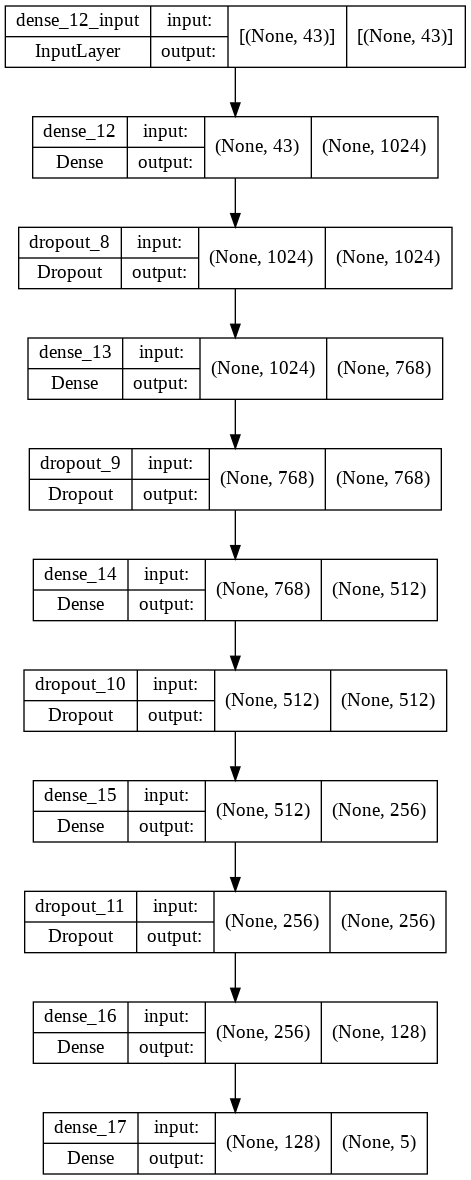

In [238]:
tf.keras.utils.plot_model(dnn_model, 'dnn_model.png', show_shapes=True)#Architechture

In [239]:
model_pred=dnn_model.predict(x_test)#prediction using the test data
model_pred= np.argmax(model_pred, axis = 1) #highest probability
model_true=y_test
model_true= np.argmax(model_true, axis = 1)

#Accuracy Score:-
Accuracy=accuracy_score(model_true,model_pred)*100
print('Accuracy =',Accuracy)

#Precision Score:-
Precision = precision_score(model_true, model_pred, average= "weighted")
print('Precision =',Precision)

#Recall Scores:-
Recall = recall_score(model_true, model_pred, average= "weighted")
print('Recall =',Recall)

#F1 Scores:-
F1 = f1_score(model_true, model_pred, average= "weighted")
print('F1 score =',F1)

Accuracy = 98.34358731661146
Precision = 0.9839033226527641
Recall = 0.9834358731661146
F1 score = 0.9835329336509575


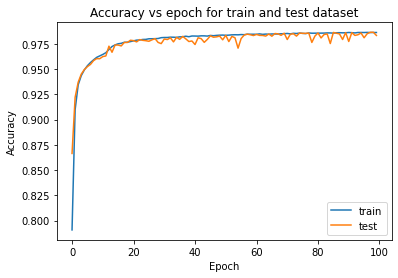

In [240]:
#plot of training and testing data's accuracy on each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy vs epoch for train and test dataset")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

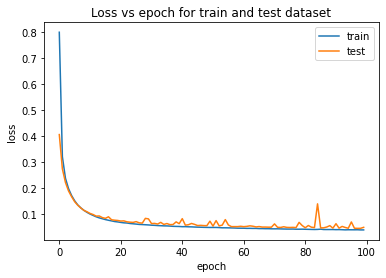

In [241]:
#plot describing training and testing data's loss value on each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epoch for train and test dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [242]:
model_pred=dnn_model.predict(x_test)#prediction using the test data
pred= np.argmax(model_pred, axis = 1)
print(pred)

[4 4 0 ... 0 4 1]


# **Convolutional neural network**

### CNN : Model 1
*   **Model contains 5 layer over all with 3 being convolutional layer ,1 hidden layer and an output layer.**
*   **Activation function : Relu,softmax**
*   **Optimizer : Adam**




In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
X_train.shape

(103534, 43, 1)

In [ ]:
X_test.shape

(44373, 43, 1)

In [ ]:
cnn_model = Sequential()
cnn_model.add(Convolution1D(64,5, padding="same",activation="relu",input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=(4)))
cnn_model.add(Dropout(0.01))
cnn_model.add(Convolution1D(128, 5, padding="same", activation="relu"))
cnn_model.add(MaxPooling1D(pool_size=(2)))
cnn_model.add(Dropout(0.01))
cnn_model.add(Convolution1D(512, 5, padding="same", activation="relu"))
cnn_model.add(MaxPooling1D(pool_size=(2)))
cnn_model.add(Dropout(0.01))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation="relu"))
cnn_model.add(Dropout(0.01))
cnn_model.add(Dense(5, activation="softmax"))


In [ ]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])#compliling the model with loss ,optimizer,metric as accuracyto calculate the model accuracy
history=cnn_model.fit(X_train, y_train, epochs=100, batch_size=500, validation_data=(X_test, y_test)) #model training with batch size of 500 and 100 epoch .The model train on training data and validate with test data


Epoch 1/100
208/208 [==============================] - 129s 617ms/step - loss: 0.1957 - accuracy: 0.9382 - val_loss: 0.0864 - val_accuracy: 0.9705
Epoch 2/100
208/208 [==============================] - 127s 609ms/step - loss: 0.0713 - accuracy: 0.9756 - val_loss: 0.0668 - val_accuracy: 0.9781
Epoch 3/100
208/208 [==============================] - 139s 667ms/step - loss: 0.0621 - accuracy: 0.9786 - val_loss: 0.0639 - val_accuracy: 0.9764
Epoch 4/100
208/208 [==============================] - 113s 543ms/step - loss: 0.0569 - accuracy: 0.9801 - val_loss: 0.0553 - val_accuracy: 0.9819
Epoch 5/100
208/208 [==============================] - 111s 535ms/step - loss: 0.0520 - accuracy: 0.9820 - val_loss: 0.0563 - val_accuracy: 0.9829
Epoch 6/100
208/208 [==============================] - 113s 545ms/step - loss: 0.0504 - accuracy: 0.9828 - val_loss: 0.0535 - val_accuracy: 0.9808
Epoch 7/100
208/208 [==============================] - 119s 572ms/step - loss: 0.0476 - accuracy: 0.9830 - val_loss: 0

In [ ]:
cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 43, 64)            384       
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 10, 64)           0         
 g1D)                                                            
                                                                 
 dropout_23 (Dropout)        (None, 10, 64)            0         
                                                                 
 conv1d_16 (Conv1D)          (None, 10, 128)           41088     
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 5, 128)           0         
 g1D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 5, 128)           

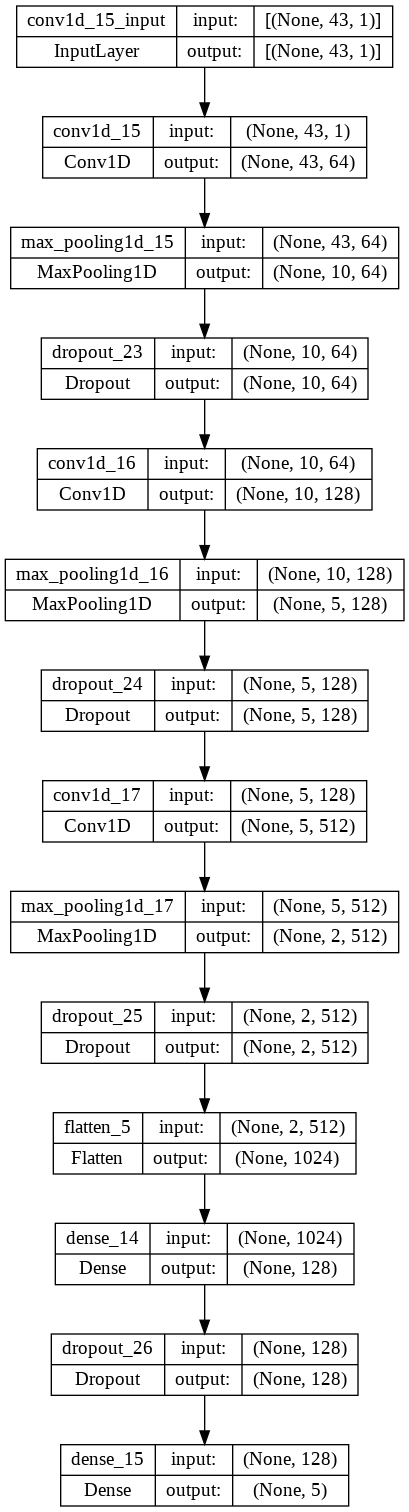

In [ ]:
tf.keras.utils.plot_model(cnn_model, 'cnn_model.png', show_shapes=True)

In [ ]:
loss,accuracy=cnn_model.evaluate(X_test, y_test, verbose=1)#loss and accuracy on the test data
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

1387/1387 [==============================] - 10s 7ms/step - loss: 0.0394 - accuracy: 0.9904

Loss: 0.04, Accuracy: 99.04%


In [ ]:
model_pred=cnn_model.predict(x_test)
model_pred= np.argmax(model_pred, axis = 1)
model_true=y_test
model_true= np.argmax(model_true, axis = 1)

#Accuracy Score:-
Accuracy=accuracy_score(model_true,model_pred)*100
print('Accuracy =',Accuracy)

#Precision Score:-
Precision = precision_score(model_true, model_pred, average= "weighted")
print('Precision =',Precision)

#Recall Scores:-
Recall = recall_score(model_true, model_pred, average= "weighted")
print('Recall =',Recall)

#F1 Scores:-
F1 = f1_score(model_true, model_pred, average= "weighted")
print('F1 score =',F1)

1387/1387 [==============================] - 11s 8ms/step
Accuracy = 99.03995673044419
Precision = 0.9901594647322735
Recall = 0.9903995673044419
F1 score = 0.990219692572269


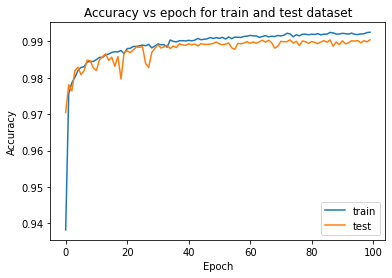

In [ ]:
#plot of training and testing data's accuracy on each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy vs epoch for train and test dataset")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

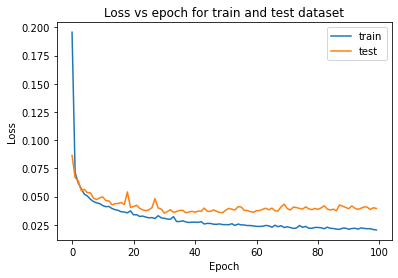

In [ ]:
#plot describing training and testing data's loss value on each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epoch for train and test dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

### CNN : Model 2
*   **Model contains 5 layer over all with 3 being convolutional layer ,1 hidden layer and an output layer.**
*   **Activation function : Relu,softmax**
*   **Optimizer : Sgd**


In [321]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [244]:
cnn_model = Sequential()
cnn_model.add(Convolution1D(64,5, padding="same",activation="relu",input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=(4)))
cnn_model.add(Dropout(0.01))
cnn_model.add(Convolution1D(128, 5, padding="same", activation="relu"))
cnn_model.add(MaxPooling1D(pool_size=(2)))
cnn_model.add(Dropout(0.01))
cnn_model.add(Convolution1D(512, 5, padding="same", activation="relu"))
cnn_model.add(MaxPooling1D(pool_size=(2)))
cnn_model.add(Dropout(0.01))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation="relu"))
cnn_model.add(Dropout(0.01))
cnn_model.add(Dense(5, activation="softmax"))


In [245]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])#compliling the model with loss ,optimizer,metric as accuracyto calculate the model accuracy
history=cnn_model.fit(X_train, y_train, epochs=100, batch_size=500, validation_data=(X_test, y_test)) #model training with batch size of 500 and 100 epoch .The model train on training data and validate with test data


Epoch 1/100
208/208 [==============================] - 130s 622ms/step - loss: 0.9875 - accuracy: 0.7830 - val_loss: 0.6270 - val_accuracy: 0.8386
Epoch 2/100
208/208 [==============================] - 116s 556ms/step - loss: 0.4448 - accuracy: 0.8713 - val_loss: 0.3595 - val_accuracy: 0.8787
Epoch 3/100
208/208 [==============================] - 107s 516ms/step - loss: 0.3144 - accuracy: 0.9089 - val_loss: 0.2916 - val_accuracy: 0.9098
Epoch 4/100
208/208 [==============================] - 122s 587ms/step - loss: 0.2663 - accuracy: 0.9208 - val_loss: 0.2663 - val_accuracy: 0.9161
Epoch 5/100
208/208 [==============================] - 121s 581ms/step - loss: 0.2334 - accuracy: 0.9299 - val_loss: 0.2258 - val_accuracy: 0.9292
Epoch 6/100
208/208 [==============================] - 116s 559ms/step - loss: 0.2078 - accuracy: 0.9370 - val_loss: 0.2094 - val_accuracy: 0.9343
Epoch 7/100
208/208 [==============================] - 109s 522ms/step - loss: 0.1884 - accuracy: 0.9411 - val_loss: 0

In [246]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 43, 64)            384       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 64)           0         
 )                                                               
                                                                 
 dropout_12 (Dropout)        (None, 10, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           41088     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 128)           0         
 1D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 5, 128)           

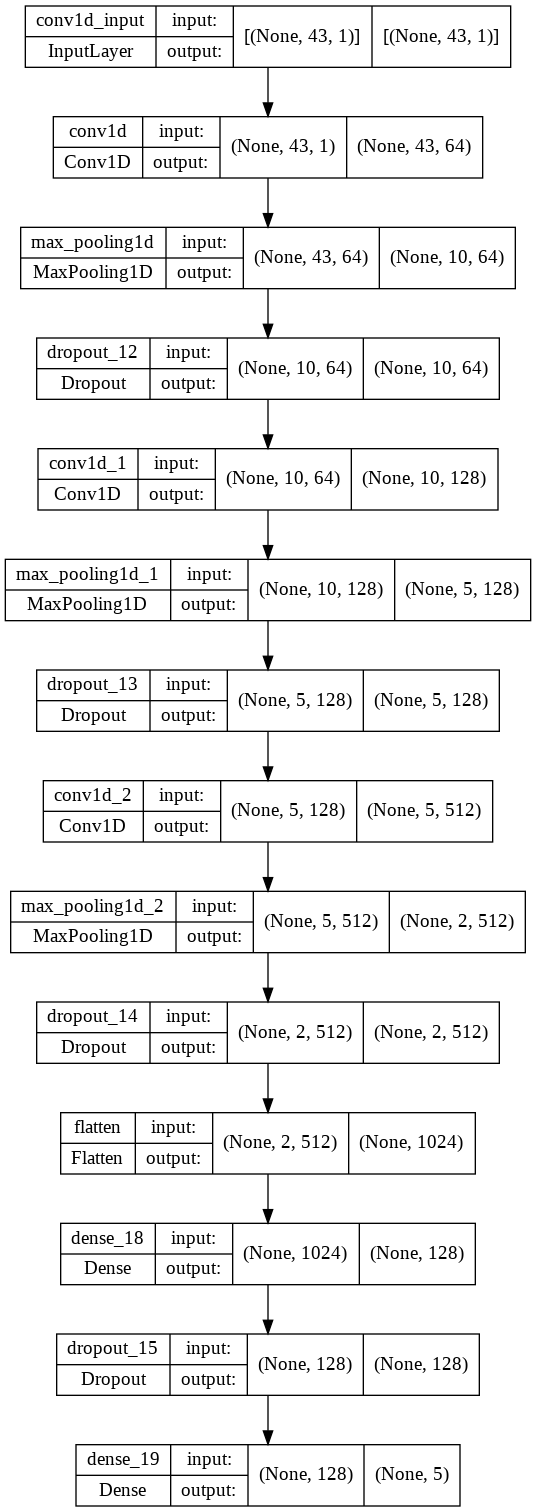

In [247]:
tf.keras.utils.plot_model(cnn_model, 'cnn_model.png', show_shapes=True)

In [248]:
loss,accuracy=cnn_model.evaluate(X_test, y_test, verbose=1)#loss and accuracy on the test data
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

1387/1387 [==============================] - 7s 5ms/step - loss: 0.0579 - accuracy: 0.9807

Loss: 0.06, Accuracy: 98.07%


In [249]:
model_pred=cnn_model.predict(x_test)
model_pred= np.argmax(model_pred, axis = 1)
model_true=y_test
model_true= np.argmax(model_true, axis = 1)

#Accuracy Score:-
Accuracy=accuracy_score(model_true,model_pred)*100
print('Accuracy =',Accuracy)

#Precision Score:-
Precision = precision_score(model_true, model_pred, average= "weighted")
print('Precision =',Precision)

#Recall Scores:-
Recall = recall_score(model_true, model_pred, average= "weighted")
print('Recall =',Recall)

#F1 Scores:-
F1 = f1_score(model_true, model_pred, average= "weighted")
print('F1 score =',F1)

Accuracy = 98.07089897009442
Precision = 0.981331232449295
Recall = 0.9807089897009442
F1 score = 0.9808630175586683


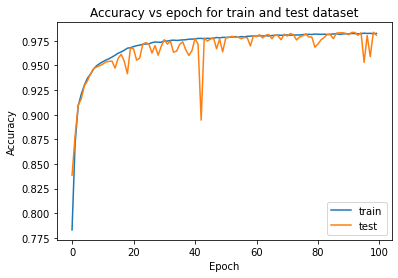

In [250]:
#plot of training and testing data's accuracy on each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy vs epoch for train and test dataset")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

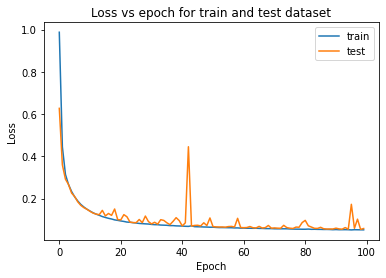

In [251]:
#plot describing training and testing data's loss value on each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epoch for train and test dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

# **Long short-term memory**

### LSTM : Model 1
*   **Model contains 5 layer over all with 4 being lstm layer and an output layer.**
*   **Activation function : softmax**
*   **Optimizer : Adam**


In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(64,input_dim=X_train.shape[1], return_sequences=True))  
lstm_model.add(Dropout(0.01))
lstm_model.add(LSTM(64,return_sequences=True)) 
lstm_model.add(Dropout(0.01))
lstm_model.add(LSTM(64, return_sequences=True)) 
lstm_model.add(Dropout(0.01))
lstm_model.add(LSTM(64, return_sequences=False))
lstm_model.add(Dropout(0.01))
lstm_model.add(Dense(5))
lstm_model.add(Activation('softmax'))

In [ ]:
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])#compiling the model
history= lstm_model.fit(x_train, y_train, epochs=100, batch_size=500, validation_data=(x_test, y_test)) #fitting the model with training dataset and then validating on test data


Epoch 1/100
208/208 [==============================] - 194s 895ms/step - loss: 0.6102 - accuracy: 0.7777 - val_loss: 0.4705 - val_accuracy: 0.8197
Epoch 2/100
208/208 [==============================] - 198s 953ms/step - loss: 0.3840 - accuracy: 0.8604 - val_loss: 0.2902 - val_accuracy: 0.8902
Epoch 3/100
208/208 [==============================] - 199s 956ms/step - loss: 0.3001 - accuracy: 0.8937 - val_loss: 0.2843 - val_accuracy: 0.8960
Epoch 4/100
208/208 [==============================] - 183s 882ms/step - loss: 0.2737 - accuracy: 0.9040 - val_loss: 0.2732 - val_accuracy: 0.9027
Epoch 5/100
208/208 [==============================] - 184s 884ms/step - loss: 0.2178 - accuracy: 0.9236 - val_loss: 0.1970 - val_accuracy: 0.9280
Epoch 6/100
208/208 [==============================] - 180s 867ms/step - loss: 0.1810 - accuracy: 0.9356 - val_loss: 0.1762 - val_accuracy: 0.9383
Epoch 7/100
208/208 [==============================] - 179s 861ms/step - loss: 0.1644 - accuracy: 0.9421 - val_loss: 0

In [ ]:
lstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, None, 64)          16896     
                                                                 
 dropout_20 (Dropout)        (None, None, 64)          0         
                                                                 
 lstm_21 (LSTM)              (None, None, 64)          33024     
                                                                 
 dropout_21 (Dropout)        (None, None, 64)          0         
                                                                 
 lstm_22 (LSTM)              (None, None, 64)          33024     
                                                                 
 dropout_22 (Dropout)        (None, None, 64)          0         
                                                                 
 lstm_23 (LSTM)              (None, 64)               

In [ ]:
loss,accuracy=lstm_model.evaluate(x_test, y_test, verbose=1)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

1387/1387 [==============================] - 45s 32ms/step - loss: 0.0480 - accuracy: 0.9852

Loss: 0.05, Accuracy: 98.52%


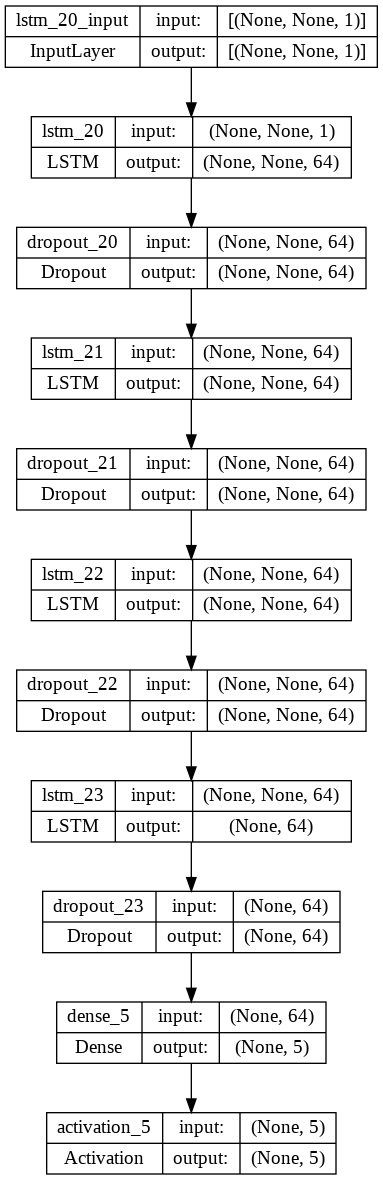

In [ ]:
tf.keras.utils.plot_model(lstm_model, 'lstm_model.png', show_shapes=True)

In [ ]:
model_pred=lstm_model.predict(x_test)
model_pred= np.argmax(model_pred, axis = 1)
model_true=y_test
model_true= np.argmax(model_true, axis = 1)

#Accuracy Score:-
Accuracy=accuracy_score(model_true,model_pred)*100
print('Accuracy =',Accuracy)

#Precision Score:-
Precision = precision_score(model_true, model_pred, average= "weighted")
print('Precision =',Precision)

#Recall Scores:-
Recall = recall_score(model_true, model_pred, average= "weighted")
print('Recall =',Recall)

#F1 Scores:-
F1 = f1_score(model_true, model_pred, average= "weighted")
print('F1 score =',F1)

1387/1387 [==============================] - 44s 30ms/step
Accuracy = 98.51711626439501
Precision = 0.9848637238794531
Recall = 0.9851711626439501
F1 score = 0.9849583357703254


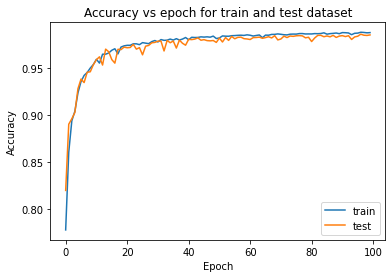

In [ ]:
#plot of training and testing data's accuracy on each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy vs epoch for train and test dataset")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

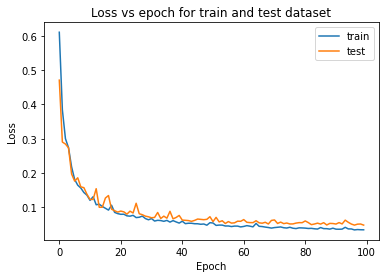

In [ ]:
#plot describing training and testing data's loss value on each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epoch for train and test dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

### LSTM : Model 2
*   **Model contains 5 layer over all with 4 being lstm layer and an output layer.**
*   **Activation function : softmax**
*   **Optimizer : sgd**


In [339]:
X_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
X_train.shape



(103534, 1, 43)

In [340]:
X_test = np.reshape(X_test, (X_test.shape[0],1, X_test.shape[1]))
X_test.shape

(44373, 1, 43)

In [341]:
lstm_model = Sequential()
lstm_model.add(LSTM(64,input_dim=43, return_sequences=True))  
lstm_model.add(Dropout(0.1))
lstm_model.add(LSTM(64,return_sequences=True)) 
lstm_model.add(Dropout(0.1))
lstm_model.add(LSTM(64, return_sequences=True)) 
lstm_model.add(Dropout(0.1))
lstm_model.add(LSTM(64, return_sequences=False))
lstm_model.add(Dropout(0.1))
lstm_model.add(Dense(5))
lstm_model.add(Activation('softmax'))

In [346]:
lstm_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])#compiling the model
history= lstm_model.fit(X_train, y_train, epochs=100, batch_size=500, validation_data=(X_test, y_test)) #fitting the model with training dataset and then validating on test data


Epoch 1/100
208/208 [==============================] - 16s 37ms/step - loss: 0.5541 - accuracy: 0.8464 - val_loss: 0.5593 - val_accuracy: 0.8409
Epoch 2/100
208/208 [==============================] - 6s 30ms/step - loss: 0.5436 - accuracy: 0.8468 - val_loss: 0.5497 - val_accuracy: 0.8415
Epoch 3/100
208/208 [==============================] - 6s 30ms/step - loss: 0.5348 - accuracy: 0.8475 - val_loss: 0.5414 - val_accuracy: 0.8417
Epoch 4/100
208/208 [==============================] - 6s 30ms/step - loss: 0.5266 - accuracy: 0.8480 - val_loss: 0.5341 - val_accuracy: 0.8424
Epoch 5/100
208/208 [==============================] - 6s 30ms/step - loss: 0.5200 - accuracy: 0.8485 - val_loss: 0.5274 - val_accuracy: 0.8427
Epoch 6/100
208/208 [==============================] - 7s 35ms/step - loss: 0.5135 - accuracy: 0.8488 - val_loss: 0.5212 - val_accuracy: 0.8430
Epoch 7/100
208/208 [==============================] - 7s 33ms/step - loss: 0.5076 - accuracy: 0.8490 - val_loss: 0.5154 - val_accuracy

In [347]:
lstm_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, None, 64)          27648     
                                                                 
 dropout_48 (Dropout)        (None, None, 64)          0         
                                                                 
 lstm_33 (LSTM)              (None, None, 64)          33024     
                                                                 
 dropout_49 (Dropout)        (None, None, 64)          0         
                                                                 
 lstm_34 (LSTM)              (None, None, 64)          33024     
                                                                 
 dropout_50 (Dropout)        (None, None, 64)          0         
                                                                 
 lstm_35 (LSTM)              (None, 64)              

In [348]:
loss,accuracy=lstm_model.evaluate(X_test, y_test, verbose=1)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

1387/1387 [==============================] - 4s 3ms/step - loss: 0.2540 - accuracy: 0.9361

Loss: 0.25, Accuracy: 93.61%


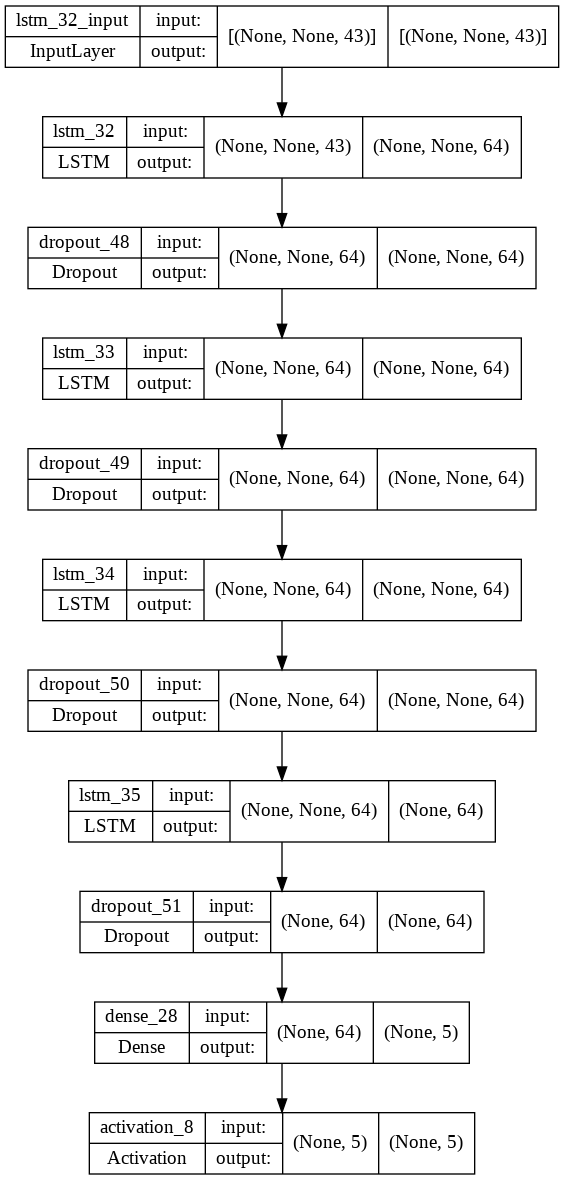

In [349]:
tf.keras.utils.plot_model(lstm_model, 'lstm_model.png', show_shapes=True)

In [351]:
model_pred=lstm_model.predict(X_test)
model_pred= np.argmax(model_pred, axis = 1)
model_true=y_test
model_true= np.argmax(model_true, axis = 1)

#Accuracy Score:-
Accuracy=accuracy_score(model_true,model_pred)*100
print('Accuracy =',Accuracy)

#Precision Score:-
Precision = precision_score(model_true, model_pred, average= "weighted")
print('Precision =',Precision)

#Recall Scores:-
Recall = recall_score(model_true, model_pred, average= "weighted")
print('Recall =',Recall)

#F1 Scores:-
F1 = f1_score(model_true, model_pred, average= "weighted")
print('F1 score =',F1)

Accuracy = 93.60872602708854
Precision = 0.9107890651856775
Recall = 0.9360872602708854
F1 score = 0.9230247278913961


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


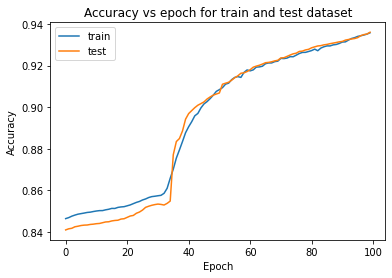

In [352]:
#plot of training and testing data's accuracy on each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy vs epoch for train and test dataset")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

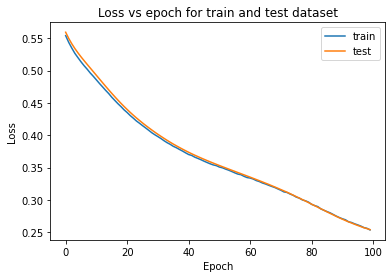

In [353]:
#plot describing training and testing data's loss value on each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epoch for train and test dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

## **Gated Recurrent Unit(GRU)**

### GRU : Model 1
*   **Model contains 5 layer over all with 4 being GRU layer and an output layer.**
*   **Activation function : softmax**
*   **Optimizer : Adam**


In [354]:
gru_model = Sequential()
gru_model.add(GRU(64,input_dim=X_train.shape[2], return_sequences=True))
gru_model.add(Dropout(0.01))
gru_model.add(GRU(64,return_sequences=True)) 
gru_model.add(Dropout(0.01))
gru_model.add(GRU(64, return_sequences=True))
gru_model.add(Dropout(0.01))
gru_model.add(GRU(64, return_sequences=False))
gru_model.add(Dense(5))
gru_model.add(Activation('softmax'))

In [355]:
gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=gru_model.fit(X_train, y_train, epochs=50, batch_size=500, validation_data=(X_test, y_test))  


Epoch 1/50
208/208 [==============================] - 14s 33ms/step - loss: 0.3829 - accuracy: 0.9125 - val_loss: 0.1227 - val_accuracy: 0.9549
Epoch 2/50
208/208 [==============================] - 5s 25ms/step - loss: 0.0926 - accuracy: 0.9693 - val_loss: 0.0858 - val_accuracy: 0.9713
Epoch 3/50
208/208 [==============================] - 5s 25ms/step - loss: 0.0749 - accuracy: 0.9751 - val_loss: 0.0766 - val_accuracy: 0.9731
Epoch 4/50
208/208 [==============================] - 6s 27ms/step - loss: 0.0671 - accuracy: 0.9774 - val_loss: 0.0690 - val_accuracy: 0.9796
Epoch 5/50
208/208 [==============================] - 5s 26ms/step - loss: 0.0619 - accuracy: 0.9794 - val_loss: 0.0664 - val_accuracy: 0.9797
Epoch 6/50
208/208 [==============================] - 5s 25ms/step - loss: 0.0585 - accuracy: 0.9807 - val_loss: 0.0633 - val_accuracy: 0.9803
Epoch 7/50
208/208 [==============================] - 5s 26ms/step - loss: 0.0565 - accuracy: 0.9809 - val_loss: 0.0607 - val_accuracy: 0.980

In [356]:
loss,accuracy=gru_model.evaluate(X_test, y_test, verbose=1)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

1387/1387 [==============================] - 3s 2ms/step - loss: 0.0398 - accuracy: 0.9881

Loss: 0.04, Accuracy: 98.81%


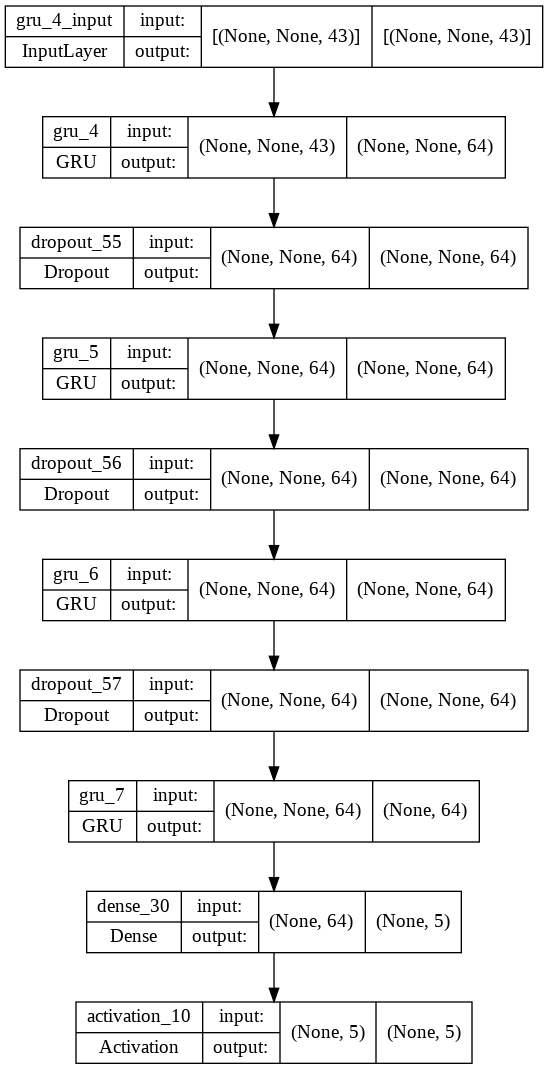

In [362]:
tf.keras.utils.plot_model(gru_model, 'gru_model.png', show_shapes=True)

In [357]:
model_pred=gru_model.predict(X_test)
model_pred= np.argmax(model_pred, axis = 1)
model_true=y_test
model_true= np.argmax(model_true, axis = 1)

#Accuracy Score:-
Accuracy=accuracy_score(model_true,model_pred)*100
print('Accuracy =',Accuracy)

#Precision Score:-
Precision = precision_score(model_true, model_pred, average= "weighted")
print('Precision =',Precision)

#Recall Scores:-
Recall = recall_score(model_true, model_pred, average= "weighted")
print('Recall =',Recall)

#F1 Scores:-
F1 = f1_score(model_true, model_pred, average= "weighted")
print('F1 score =',F1)

Accuracy = 98.81234083789691
Precision = 0.9879584670243245
Recall = 0.9881234083789692
F1 score = 0.9880088440642805


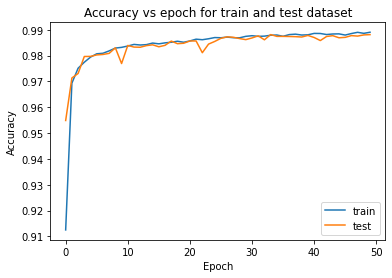

In [358]:
#plot of training and testing data's accuracy on each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy vs epoch for train and test dataset")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

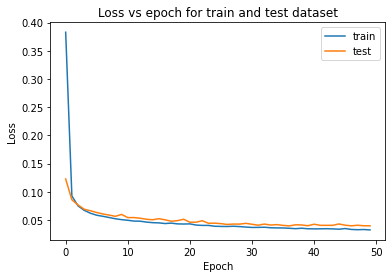

In [359]:
#plot describing training and testing data's loss value on each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epoch for train and test dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

### GRU : Model 2
*   **Model contains 5 layer over all with 4 being GRU layer and an output layer.**
*   **Activation function : softmax**
*   **Optimizer : Sgd**


In [360]:
gru_model = Sequential()
gru_model.add(GRU(64,input_dim=X_train.shape[2], return_sequences=True))
gru_model.add(Dropout(0.01))
gru_model.add(GRU(64,return_sequences=True)) 
gru_model.add(Dropout(0.01))
gru_model.add(GRU(64, return_sequences=True))
gru_model.add(Dropout(0.01))
gru_model.add(GRU(64, return_sequences=False))
gru_model.add(Dense(5))
gru_model.add(Activation('softmax'))

In [363]:
gru_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history=gru_model.fit(X_train, y_train, epochs=50, batch_size=500, validation_data=(X_test, y_test))  


Epoch 1/50
208/208 [==============================] - 14s 30ms/step - loss: 1.3689 - accuracy: 0.5156 - val_loss: 1.2135 - val_accuracy: 0.5205
Epoch 2/50
208/208 [==============================] - 5s 23ms/step - loss: 1.1403 - accuracy: 0.5203 - val_loss: 1.0943 - val_accuracy: 0.5205
Epoch 3/50
208/208 [==============================] - 6s 28ms/step - loss: 1.0550 - accuracy: 0.5203 - val_loss: 1.0292 - val_accuracy: 0.5205
Epoch 4/50
208/208 [==============================] - 5s 23ms/step - loss: 0.9829 - accuracy: 0.5651 - val_loss: 0.9421 - val_accuracy: 0.7330
Epoch 5/50
208/208 [==============================] - 5s 24ms/step - loss: 0.8576 - accuracy: 0.8135 - val_loss: 0.7782 - val_accuracy: 0.8239
Epoch 6/50
208/208 [==============================] - 5s 23ms/step - loss: 0.6862 - accuracy: 0.8352 - val_loss: 0.6351 - val_accuracy: 0.8356
Epoch 7/50
208/208 [==============================] - 5s 23ms/step - loss: 0.5882 - accuracy: 0.8427 - val_loss: 0.5771 - val_accuracy: 0.838

In [364]:
loss,accuracy=gru_model.evaluate(X_test, y_test, verbose=1)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

1387/1387 [==============================] - 3s 2ms/step - loss: 0.1837 - accuracy: 0.9466

Loss: 0.18, Accuracy: 94.66%


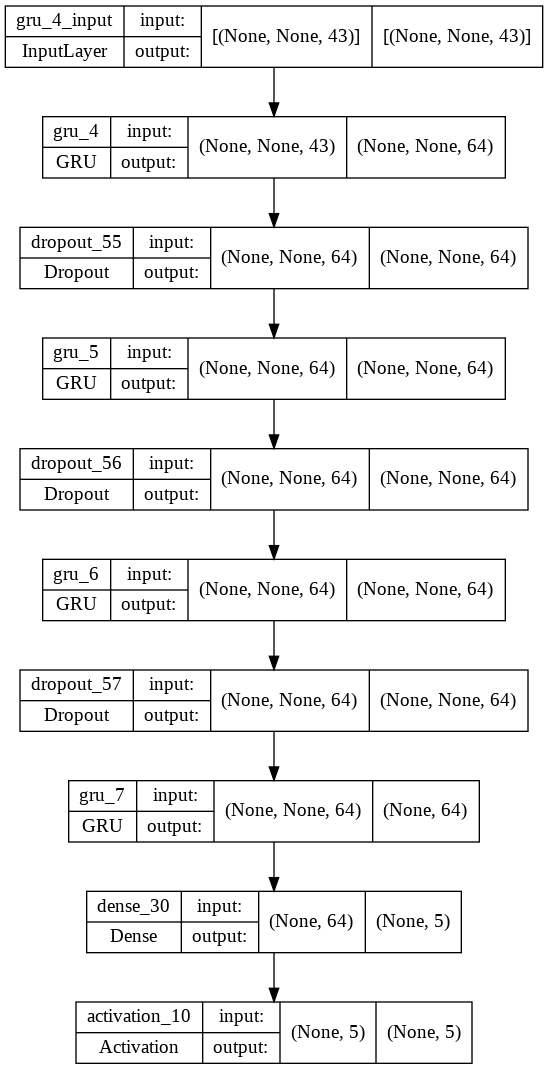

In [365]:
tf.keras.utils.plot_model(gru_model, 'gru_model.png', show_shapes=True)

In [366]:
model_pred=gru_model.predict(X_test)
model_pred= np.argmax(model_pred, axis = 1)
model_true=y_test
model_true= np.argmax(model_true, axis = 1)

#Accuracy Score:-
Accuracy=accuracy_score(model_true,model_pred)*100
print('Accuracy =',Accuracy)

#Precision Score:-
Precision = precision_score(model_true, model_pred, average= "weighted")
print('Precision =',Precision)

#Recall Scores:-
Recall = recall_score(model_true, model_pred, average= "weighted")
print('Recall =',Recall)

#F1 Scores:-
F1 = f1_score(model_true, model_pred, average= "weighted")
print('F1 score =',F1)

Accuracy = 94.65891420458387
Precision = 0.920474807287462
Recall = 0.9465891420458387
F1 score = 0.9331550359676098


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


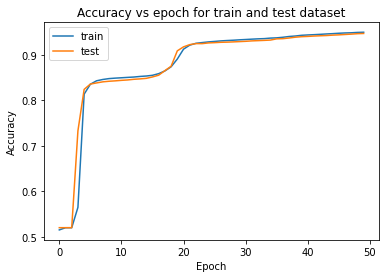

In [367]:
#plot of training and testing data's accuracy on each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy vs epoch for train and test dataset")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

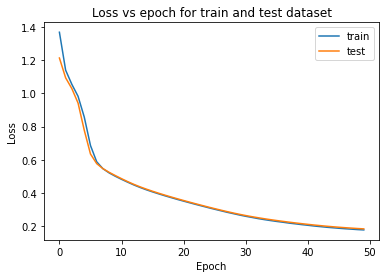

In [368]:
#plot describing training and testing data's loss value on each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epoch for train and test dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

#**Auto Encoder Classifier**

### AE Model 1
*   **Model with an input, encoding, decoding and an output layer.**
*   **Activation function : relu,softmax**
*   **Loss calculation : mean squared error**
*   **Optimizer : Adam**


In [452]:
input_layer = Input(shape=(X_train.shape[1],))
layer_1 = Dense(128, activation="relu")(input_layer)
layer_2= Dense(64, activation="relu")(layer_1) 
layer_3= Dense(32, activation="relu")(layer_2)     
output_layer = Dense(5, activation='softmax')(layer_3)

In [453]:
AE = Model(inputs=input_layer, outputs=output_layer)
AE.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [454]:
history=AE.fit(x_train, y_train, epochs=100, batch_size=500, validation_data=(x_test, y_test))  

Epoch 1/100
208/208 [==============================] - 2s 6ms/step - loss: 0.0271 - accuracy: 0.9249 - val_loss: 0.0144 - val_accuracy: 0.9564
Epoch 2/100
208/208 [==============================] - 1s 5ms/step - loss: 0.0119 - accuracy: 0.9631 - val_loss: 0.0094 - val_accuracy: 0.9700
Epoch 3/100
208/208 [==============================] - 1s 5ms/step - loss: 0.0070 - accuracy: 0.9791 - val_loss: 0.0073 - val_accuracy: 0.9788
Epoch 4/100
208/208 [==============================] - 1s 5ms/step - loss: 0.0064 - accuracy: 0.9806 - val_loss: 0.0068 - val_accuracy: 0.9793
Epoch 5/100
208/208 [==============================] - 1s 5ms/step - loss: 0.0059 - accuracy: 0.9824 - val_loss: 0.0068 - val_accuracy: 0.9794
Epoch 6/100
208/208 [==============================] - 1s 5ms/step - loss: 0.0057 - accuracy: 0.9831 - val_loss: 0.0064 - val_accuracy: 0.9818
Epoch 7/100
208/208 [==============================] - 1s 5ms/step - loss: 0.0057 - accuracy: 0.9832 - val_loss: 0.0066 - val_accuracy: 0.9808

In [455]:
AE.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 43)]              0         
                                                                 
 dense_39 (Dense)            (None, 128)               5632      
                                                                 
 dense_40 (Dense)            (None, 64)                8256      
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 5)                 165       
                                                                 
Total params: 16,133
Trainable params: 16,133
Non-trainable params: 0
_________________________________________________________________


In [456]:
loss,accuracy=AE.evaluate(x_test, y_test, verbose=1)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

1387/1387 [==============================] - 2s 1ms/step - loss: 0.0046 - accuracy: 0.9867

Loss: 0.00, Accuracy: 98.67%


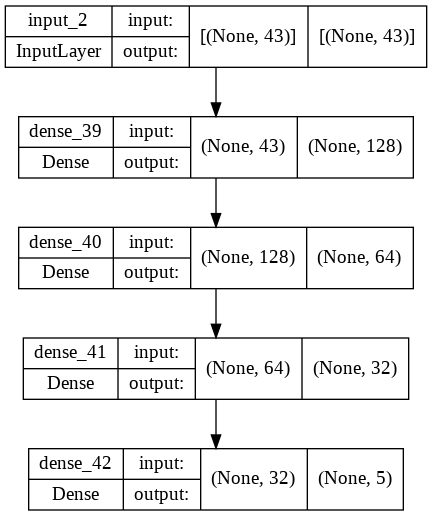

In [457]:
tf.keras.utils.plot_model(AE, 'model.png', show_shapes=True)

In [458]:
model_pred=AE.predict(x_test)
model_pred= np.argmax(model_pred, axis = 1)
model_true=y_test
model_true= np.argmax(model_true, axis = 1)

#Accuracy Score:-
Accuracy=accuracy_score(model_true,model_pred)*100
print('Accuracy =',Accuracy)

#Precision Score:-
Precision = precision_score(model_true, model_pred, average= "weighted")
print('Precision =',Precision)

#Recall Scores:-
Recall = recall_score(model_true, model_pred, average= "weighted")
print('Recall =',Recall)

#F1 Scores:-
F1 = f1_score(model_true, model_pred, average= "weighted")
print('F1 score =',F1)

Accuracy = 98.67036260789219
Precision = 0.986025811774444
Recall = 0.9867036260789218
F1 score = 0.986229092191498


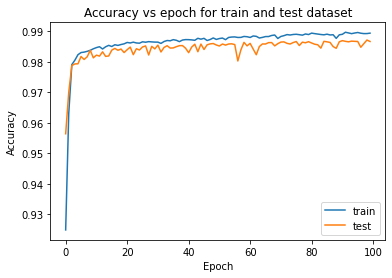

In [459]:
#plot of training and testing data's accuracy on each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy vs epoch for train and test dataset")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

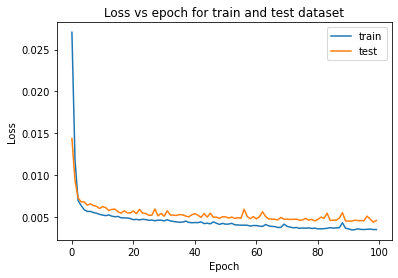

In [460]:
#plot describing training and testing data's loss value on each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epoch for train and test dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

### AE Model 2
*   **Model with an input, encoding, decoding,and an output layer.**
*   **Activation function : relu,softmax**
*   **Loss calculation : mean squared error**
*   **Optimizer : sgd**


In [56]:
input_layer = Input(shape=(X_train.shape[1],))
layer_1 = Dense(128, activation="relu")(input_layer)
layer_2= Dense(64, activation="relu")(layer_1) 
layer_3= Dense(32, activation="relu")(layer_2)     
output_layer = Dense(5, activation='softmax')(layer_3)

In [57]:
AE = Model(inputs=input_layer, outputs=output_layer)
AE.compile(optimizer='sgd', loss='mean_squared_error',metrics=['accuracy'])

In [58]:
history=AE.fit(x_train, y_train, epochs=100, batch_size=500, validation_data=(x_test, y_test))  

Epoch 1/100
208/208 [==============================] - 2s 5ms/step - loss: 0.1343 - accuracy: 0.8069 - val_loss: 0.1192 - val_accuracy: 0.8313
Epoch 2/100
208/208 [==============================] - 1s 4ms/step - loss: 0.1032 - accuracy: 0.8366 - val_loss: 0.0894 - val_accuracy: 0.8319
Epoch 3/100
208/208 [==============================] - 1s 4ms/step - loss: 0.0767 - accuracy: 0.8412 - val_loss: 0.0671 - val_accuracy: 0.8383
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 0.0592 - accuracy: 0.8454 - val_loss: 0.0551 - val_accuracy: 0.8404
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.0508 - accuracy: 0.8472 - val_loss: 0.0495 - val_accuracy: 0.8415
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.0466 - accuracy: 0.8477 - val_loss: 0.0463 - val_accuracy: 0.8419
Epoch 7/100
208/208 [==============================] - 1s 4ms/step - loss: 0.0438 - accuracy: 0.8481 - val_loss: 0.0439 - val_accuracy: 0.8428

In [59]:
AE.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 43)]              0         
                                                                 
 dense (Dense)               (None, 128)               5632      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                                 
Total params: 16,133
Trainable params: 16,133
Non-trainable params: 0
_________________________________________________________________


In [60]:
loss,accuracy=AE.evaluate(x_test, y_test, verbose=1)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

1387/1387 [==============================] - 2s 1ms/step - loss: 0.0187 - accuracy: 0.9440

Loss: 0.02, Accuracy: 94.40%


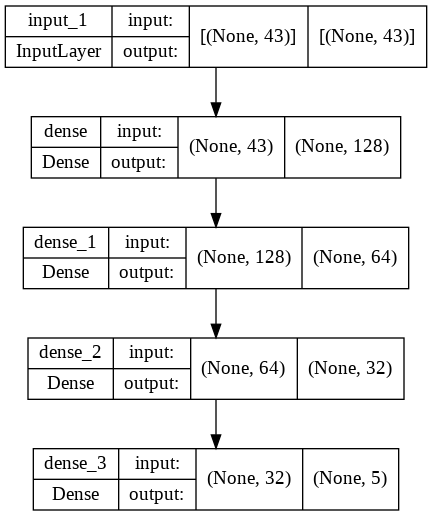

In [61]:
tf.keras.utils.plot_model(AE, 'model.png', show_shapes=True)

In [62]:
model_pred=AE.predict(x_test)
model_pred= np.argmax(model_pred, axis = 1)
model_true=y_test
model_true= np.argmax(model_true, axis = 1)

#Accuracy Score:-
Accuracy=accuracy_score(model_true,model_pred)*100
print('Accuracy =',Accuracy)

#Precision Score:-
Precision = precision_score(model_true, model_pred, average= "weighted")
print('Precision =',Precision)

#Recall Scores:-
Recall = recall_score(model_true, model_pred, average= "weighted")
print('Recall =',Recall)

#F1 Scores:-
F1 = f1_score(model_true, model_pred, average= "weighted")
print('F1 score =',F1)

Accuracy = 94.40425483965474
Precision = 0.9427413197841066
Recall = 0.9440425483965474
F1 score = 0.9345587941298262


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


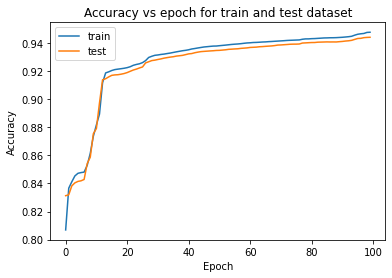

In [63]:
#plot of training and testing data's accuracy on each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy vs epoch for train and test dataset")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

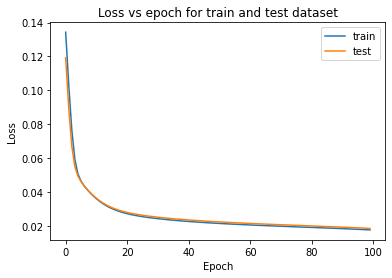

In [64]:
#plot describing training and testing data's loss value on each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epoch for train and test dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

# Final analysis after training and testing of all the models

Accuracy and F-score of different trained models on test data are given below:-


1. DNN
*   Model 1: Adam optimizer

        F1 score = 99.105216838872665
        Accuracy = 99.1120726567958
        
*   Model 2: SGD optimizer

        F1 score = 98.35329336509575
        Accuracy = 98.34358731661146


2. CNN

*   Model 1: Adam optimizer

        F1 score = 99.0219692572269
        Accuracy = 99.03995673044419

*   Model 2: SGD optimizer
        
        F1 score = 98.08630175586683
        Accuracy = 98.07089897009442

3. LSTM

* Model 1: Adam optimizer
      F1 score = 98.49583357703254
       Accuracy = 98.51711626439501


* Model 2: SGD optimizer
      F1 scores_ 92.30247278913961
      Accuracy = 93.60872602708854


4. GRU
* Model 1: Adam optimizer
      F1 scores= 98.80088440642805
      Accuracy = 98.81234083789691


* Model 2: SGD optimizer
      F1 scores= 93.31550359676098
      Accuracy = 94.65891420458387


5. AE

* Model 1: Adam optimizer

      F1 scores= 98.6229092191498
      Accuracy = 98.67036260789219

* Model 2: SGD optimizer
      F1 score = 93.45587941298262
      Accuracy = 94.40425483965474


### The DNN model provides the best accuracy of 99.11% among all the other models that were trained and tested.

Deep Neural Network


1.   Dos : 0
2.   Probe : 1
3.   R2L :  2,
4.   U2R :  3,
5.   Normal  : 4


In [447]:
best_model = pd.concat([pd.DataFrame(Attack[pred]), pd.DataFrame(Attack[model_true])], axis=1)
best_model.columns = ['Predictions', "True Value"]
best_model

,Predictions,True Value
0,4,4
1,4,4
2,0,0
3,0,0
4,4,4
...,...,...
44368,4,4
44369,4,4
44370,0,0
44371,4,4
